In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline 

import pandas as pd
data = pd.read_csv('data/ex1data1.txt', sep=",", header = None)
data.columns = ['x','y']
data.head()

,x,y
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [2]:
X = data['x'].as_matrix(); y = data['y'].as_matrix();

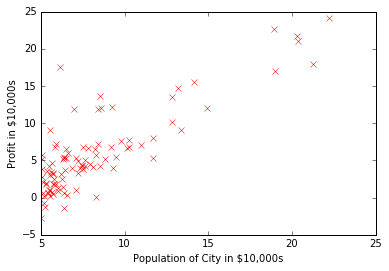

In [3]:
plt.plot(X, y,'rx')
plt.ylabel('Profit in $10,000s')
plt.xlabel('Population of City in $10,000s')

In [4]:
X = np.column_stack((np.ones(np.shape(X)[0]), X))

In [5]:
X[:5]

array([[ 1.    ,  6.1101],
       [ 1.    ,  5.5277],
       [ 1.    ,  8.5186],
       [ 1.    ,  7.0032],
       [ 1.    ,  5.8598]])

In [6]:
theta = np.zeros((2, 1), dtype=float)

In [7]:
theta

array([[ 0.],
       [ 0.]])

In [8]:
iterations = 1500;
alpha = 0.01;

In [9]:
def computeCost(X, y, theta):
    H = np.dot(X, theta)
    J = np.sum(np.square(H - np.asmatrix(y).T)) / 2 / len(y)
    return J
computeCost(X, y, theta)

32.072733877455676

In [10]:
def gradientDescent(X, y, theta, alpha, iterations):
    for iter in range(iterations):
        H = np.dot(X, theta)
        T = np.zeros(theta.shape,dtype=theta.dtype)
        for i in range(len(y)):
            T = T + np.asmatrix((H[i] - y[i]) * X[i]).T
        theta = theta - alpha * T / len(y)
    return theta

In [11]:
theta = gradientDescent(X, y, theta, alpha, iterations)

In [12]:
theta

matrix([[-3.63029144],
        [ 1.16636235]])

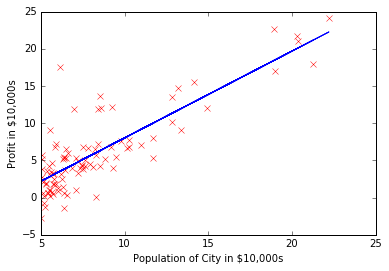

In [13]:
plt.plot(X[:,1], y,'rx')
plt.ylabel('Profit in $10,000s')
plt.xlabel('Population of City in $10,000s')
plt.plot(X[:,1], np.dot(X,theta))

In [14]:
predict1 = np.dot(np.array([1, 3.5], dtype=float) * 10000, theta)

In [15]:
predict2 = np.dot(np.array([1, 7], dtype=float) * 10000, theta)

In [16]:
theta0_vals = np.linspace(-10, 10, 100);
theta1_vals = np.linspace(-1, 4, 100);

In [17]:
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

In [18]:
J_vals.shape

(100, 100)

In [19]:
for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        t = np.row_stack((theta0_vals[i], theta1_vals[j]))
        J_vals[i,j] = computeCost(X, y, t)

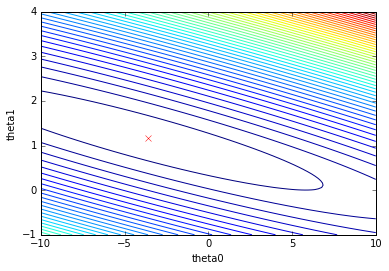

In [20]:
plt.contour(theta0_vals, theta1_vals, J_vals.T, 50)
plt.plot(theta[0], theta[1], 'rx')
plt.xlabel('theta0')
plt.ylabel('theta1')

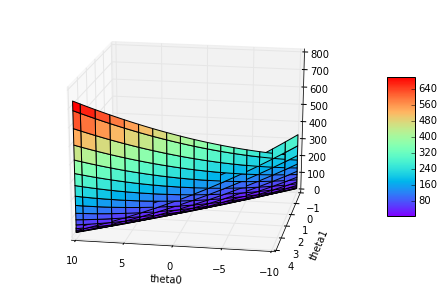

In [21]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111, projection='3d') 
ax.view_init(20, 100) #設置視角

surf = ax.plot_surface(theta0_vals, theta1_vals, J_vals.T, rstride=6, cstride=6, cmap=plt.cm.rainbow, linewidth=1, antialiased=True)
fig.colorbar(surf, shrink=0.5, aspect=5)

ax.set_xlabel('theta0')
ax.set_ylabel('theta1') 